<a href="https://colab.research.google.com/github/Gyanesh-Gunjan/Sentiment-Analysis-of-People-During-LockDown-Period/blob/master/sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas
import numpy
import re
import matplotlib.pyplot as plt
import csv
plt.style.use('fivethirtyeight')

In [2]:
# Load Data from local storage
from google.colab import files
uploaded = files.upload()

Saving RawData.txt to RawData.txt


In [0]:
# Framing all posts from RawData.txt file
with open('RawData.txt','r') as raw_file:
  posts_Data = pandas.DataFrame([tweet for tweet in raw_file], columns=['Tweets'])

In [4]:
# Display Data
posts_Data

Tweets
0    Am I being thick or is there something I'm mis...
1    There should be no kissing from 4th of May, Bu...
2    Virgin Media is down & they don’t know what th...
3    My day. 6.15am - 9.15am work. 09.15am to 11.15...
4    Thanks,ironically some journalists in global m...
..                                                 ...
445  First positive case in Purnea. Person and fami...
446  All this talk of ‘getting the UK back to work’...
447  And me. Although I did have an idea for a blog...
448  Its no different going to B&Q to buy plants or...
449  Doctors: Data Proves That Covid Death Rate is ...

[450 rows x 1 columns]

In [6]:
# Displaying first 10 Tweets Before cleaning
for i in range(0, posts_Data.shape[0]):
  print(i+1,")",posts_Data['Tweets'][i])
  if i == 9 :
    break

1 ) Am I being thick or is there something I'm missing. What difference does keeping the middle seat free make? 4 hours breathing in the recirculating air con? 2 toilets between 100 people? Walking up the aisle to go to toilet. Absolute nonsense #COVID19 #easyjet #lockdown

2 ) There should be no kissing from 4th of May, Buhari forget to say it...coronavirus can also be spread by kissing Face with tears of joy. bros body don full already after #lockdown buai na gf house(tefetefe) Face with tears of joy

3 ) Virgin Media is down & they don’t know what the cause is... This has got Carole Baskin written all over it! #virginmedia #virginmediadown #lockdown #stayhome

4 ) My day. 6.15am - 9.15am work. 09.15am to 11.15am feeding children and attempting to school them. 11.15am-8.15pm more feeding people, zoom calls, work and saying “maybe just try to do a bit of reading instead of just screens”.... “but mum, it’s minecraft Monday.” #lockdown

5 ) Thanks,ironically some journalists in global m

In [0]:
# defining function for cleaning data 
def cleanTweet(twt):
  twt = re.sub(r'@\S+','',twt)    # removed user tag
  twt = re.sub(r'#\S+','',twt)    # removed #mention
  twt = re.sub(r'RT[\S]+','',twt)         # removed RT
  twt = re.sub(r'http\S+','',twt)         # removed Links
  return twt 

In [8]:
# Cleaning all tweets 
posts_Data['Tweets'] = posts_Data['Tweets'].apply(cleanTweet)

# Displaying first 10 Tweets After cleaning
for i in range(0, posts_Data.shape[0]):
  print(i+1,")",posts_Data['Tweets'][i])
  if i == 9 :
    break

1 ) Am I being thick or is there something I'm missing. What difference does keeping the middle seat free make? 4 hours breathing in the recirculating air con? 2 toilets between 100 people? Walking up the aisle to go to toilet. Absolute nonsense   

2 ) There should be no kissing from 4th of May, Buhari forget to say it...coronavirus can also be spread by kissing Face with tears of joy. bros body don full already after  buai na gf house(tefetefe) Face with tears of joy

3 ) Virgin Media is down & they don’t know what the cause is... This has got Carole Baskin written all over it!    

4 ) My day. 6.15am - 9.15am work. 09.15am to 11.15am feeding children and attempting to school them. 11.15am-8.15pm more feeding people, zoom calls, work and saying “maybe just try to do a bit of reading instead of just screens”.... “but mum, it’s minecraft Monday.” 

5 ) Thanks,ironically some journalists in global media spaces are also attacking  in South Africa and  in Kenya,makes me wonder would they 

In [0]:
# defining function for subjectivity 
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

# defining function for Polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [10]:
# Adding Sentiment crossponding each tweets
posts_Data['Subjectivity'] = posts_Data['Tweets'].apply(getSubjectivity)

posts_Data['Polarity'] = posts_Data['Tweets'].apply(getPolarity)

# displaying data 
posts_Data

Tweets  Subjectivity  Polarity
0    Am I being thick or is there something I'm mis...      0.370833  0.011111
1    There should be no kissing from 4th of May, Bu...      0.316667  0.650000
2    Virgin Media is down & they don’t know what th...      0.288889 -0.194444
3    My day. 6.15am - 9.15am work. 09.15am to 11.15...      0.500000  0.500000
4    Thanks,ironically some journalists in global m...      0.185714  0.066667
..                                                 ...           ...       ...
445  First positive case in Purnea. Person and fami...      0.439394  0.238636
446  All this talk of ‘getting the UK back to work’...      0.000000  0.000000
447  And me. Although I did have an idea for a blog...      0.400000  0.266667
448  Its no different going to B&Q to buy plants or...      0.450000  0.000000
449  Doctors: Data Proves That Covid Death Rate is ...      0.356667  0.100000

[450 rows x 3 columns]

In [0]:
# Define function for analyzing Polarity
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0 :
    return 'Neutral'
  else:
    return 'Positive'
  

In [12]:
# Create Analysis column based on polarity
posts_Data['Analysis'] = posts_Data['Polarity'].apply(getAnalysis)

# diplay data
posts_Data

Tweets  ...  Analysis
0    Am I being thick or is there something I'm mis...  ...  Positive
1    There should be no kissing from 4th of May, Bu...  ...  Positive
2    Virgin Media is down & they don’t know what th...  ...  Negative
3    My day. 6.15am - 9.15am work. 09.15am to 11.15...  ...  Positive
4    Thanks,ironically some journalists in global m...  ...  Positive
..                                                 ...  ...       ...
445  First positive case in Purnea. Person and fami...  ...  Positive
446  All this talk of ‘getting the UK back to work’...  ...   Neutral
447  And me. Although I did have an idea for a blog...  ...  Positive
448  Its no different going to B&Q to buy plants or...  ...   Neutral
449  Doctors: Data Proves That Covid Death Rate is ...  ...  Positive

[450 rows x 4 columns]

In [13]:
# Print 15 Positive tweets
count = 1
sortedPostsData = posts_Data.sort_values(by=['Polarity'])
for i in range(0,sortedPostsData.shape[0]):
  if sortedPostsData['Analysis'][i] == 'Positive':
    print(count,")",sortedPostsData['Tweets'][i])
    print()
    if count == 15 :
      break
    count += 1

1 ) Am I being thick or is there something I'm missing. What difference does keeping the middle seat free make? 4 hours breathing in the recirculating air con? 2 toilets between 100 people? Walking up the aisle to go to toilet. Absolute nonsense   


2 ) There should be no kissing from 4th of May, Buhari forget to say it...coronavirus can also be spread by kissing Face with tears of joy. bros body don full already after  buai na gf house(tefetefe) Face with tears of joy


3 ) My day. 6.15am - 9.15am work. 09.15am to 11.15am feeding children and attempting to school them. 11.15am-8.15pm more feeding people, zoom calls, work and saying “maybe just try to do a bit of reading instead of just screens”.... “but mum, it’s minecraft Monday.” 


4 ) Thanks,ironically some journalists in global media spaces are also attacking  in South Africa and  in Kenya,makes me wonder would they really support it if/when  do it or it's simply a matter of it doesn't matter what you do or don't-single story pr

In [14]:
# Print 15 Negative tweets
count = 1
sortedPostsData = posts_Data.sort_values(by=['Polarity'])
for i in range(0,sortedPostsData.shape[0]):
  if sortedPostsData['Analysis'][i] == 'Negative':
    print(count,")",sortedPostsData['Tweets'][i])
    print()
    if count == 15:
      break
    count += 1

1 ) Virgin Media is down & they don’t know what the cause is... This has got Carole Baskin written all over it!    


2 ) I appreciate your critique on this and contextualizing Magafuli's response.Later, analysis on TZ v. Kenya's starkly different policies will be so crucial, not bc 1 is "better" but because lockdown is like Goldilocks: too much/little is differently dangerous, esp along neighbors.


3 ) Almost 2months without going to the night clubs or the beach and am still alive  has taught me the hard way.


4 ) I'm so confused - are shops just allowed to choose whether they obey the government  rules?  


5 ) A Hindu family arranges Iftar for a Muslim boy stranded in Majuli,Assam due to  


6 ) To All  we pledge to support ...due to   facing problems in such troubled times pl Feel free to contact  Mr Meraj    


7 ) Buying Property during  The Good,the Bad ,the Ugly. A Thread.


8 ) Daily walk (at last!) round the bordered up cafes of Seville 


9 ) WHAT FUCKING DAY IS IT? 


10 

In [15]:
# percentange of Positive Tweets
print("Positive Tweets % : ",end="")
ptweets = posts_Data[posts_Data.Analysis=='Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0]/posts_Data.shape[0])*100,1)

Positive Tweets % : 

56.7

In [16]:
# percentage of Neutral Tweets
neutraltwts = posts_Data[posts_Data.Analysis=='Neutral']
neutraltwts = neutraltwts['Tweets']
print("Neutral Tweets % : ",end="")
round((neutraltwts.shape[0]/posts_Data.shape[0])*100,1) 

Neutral Tweets % : 

22.9

In [17]:
# Percentage of Negative tweets
ntweets = posts_Data[posts_Data.Analysis=='Negative']
ntweets = ntweets['Tweets']
print("Negative Tweets % : ",end="")
round((ntweets.shape[0]/posts_Data.shape[0])*100,1)

Negative Tweets % : 

20.4

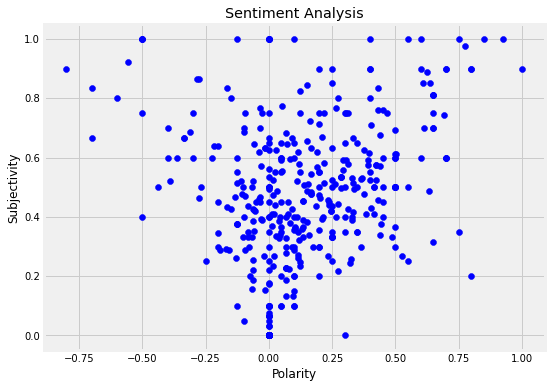

In [18]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, posts_Data.shape[0]):
  plt.scatter(posts_Data['Polarity'][i], posts_Data['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

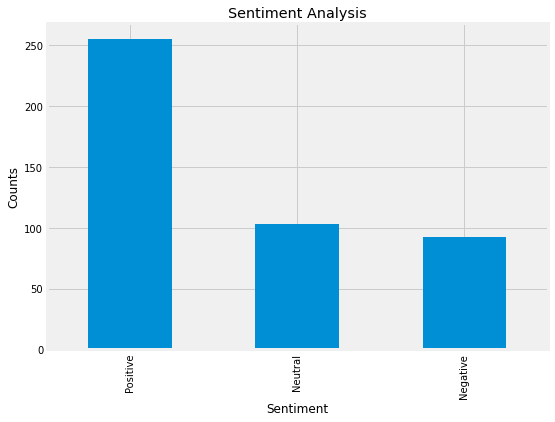

In [19]:
# show the value count
posts_Data['Analysis'].value_counts()
plt.figure(figsize=(8,6))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
posts_Data['Analysis'].value_counts().plot(kind='bar')
plt.show()

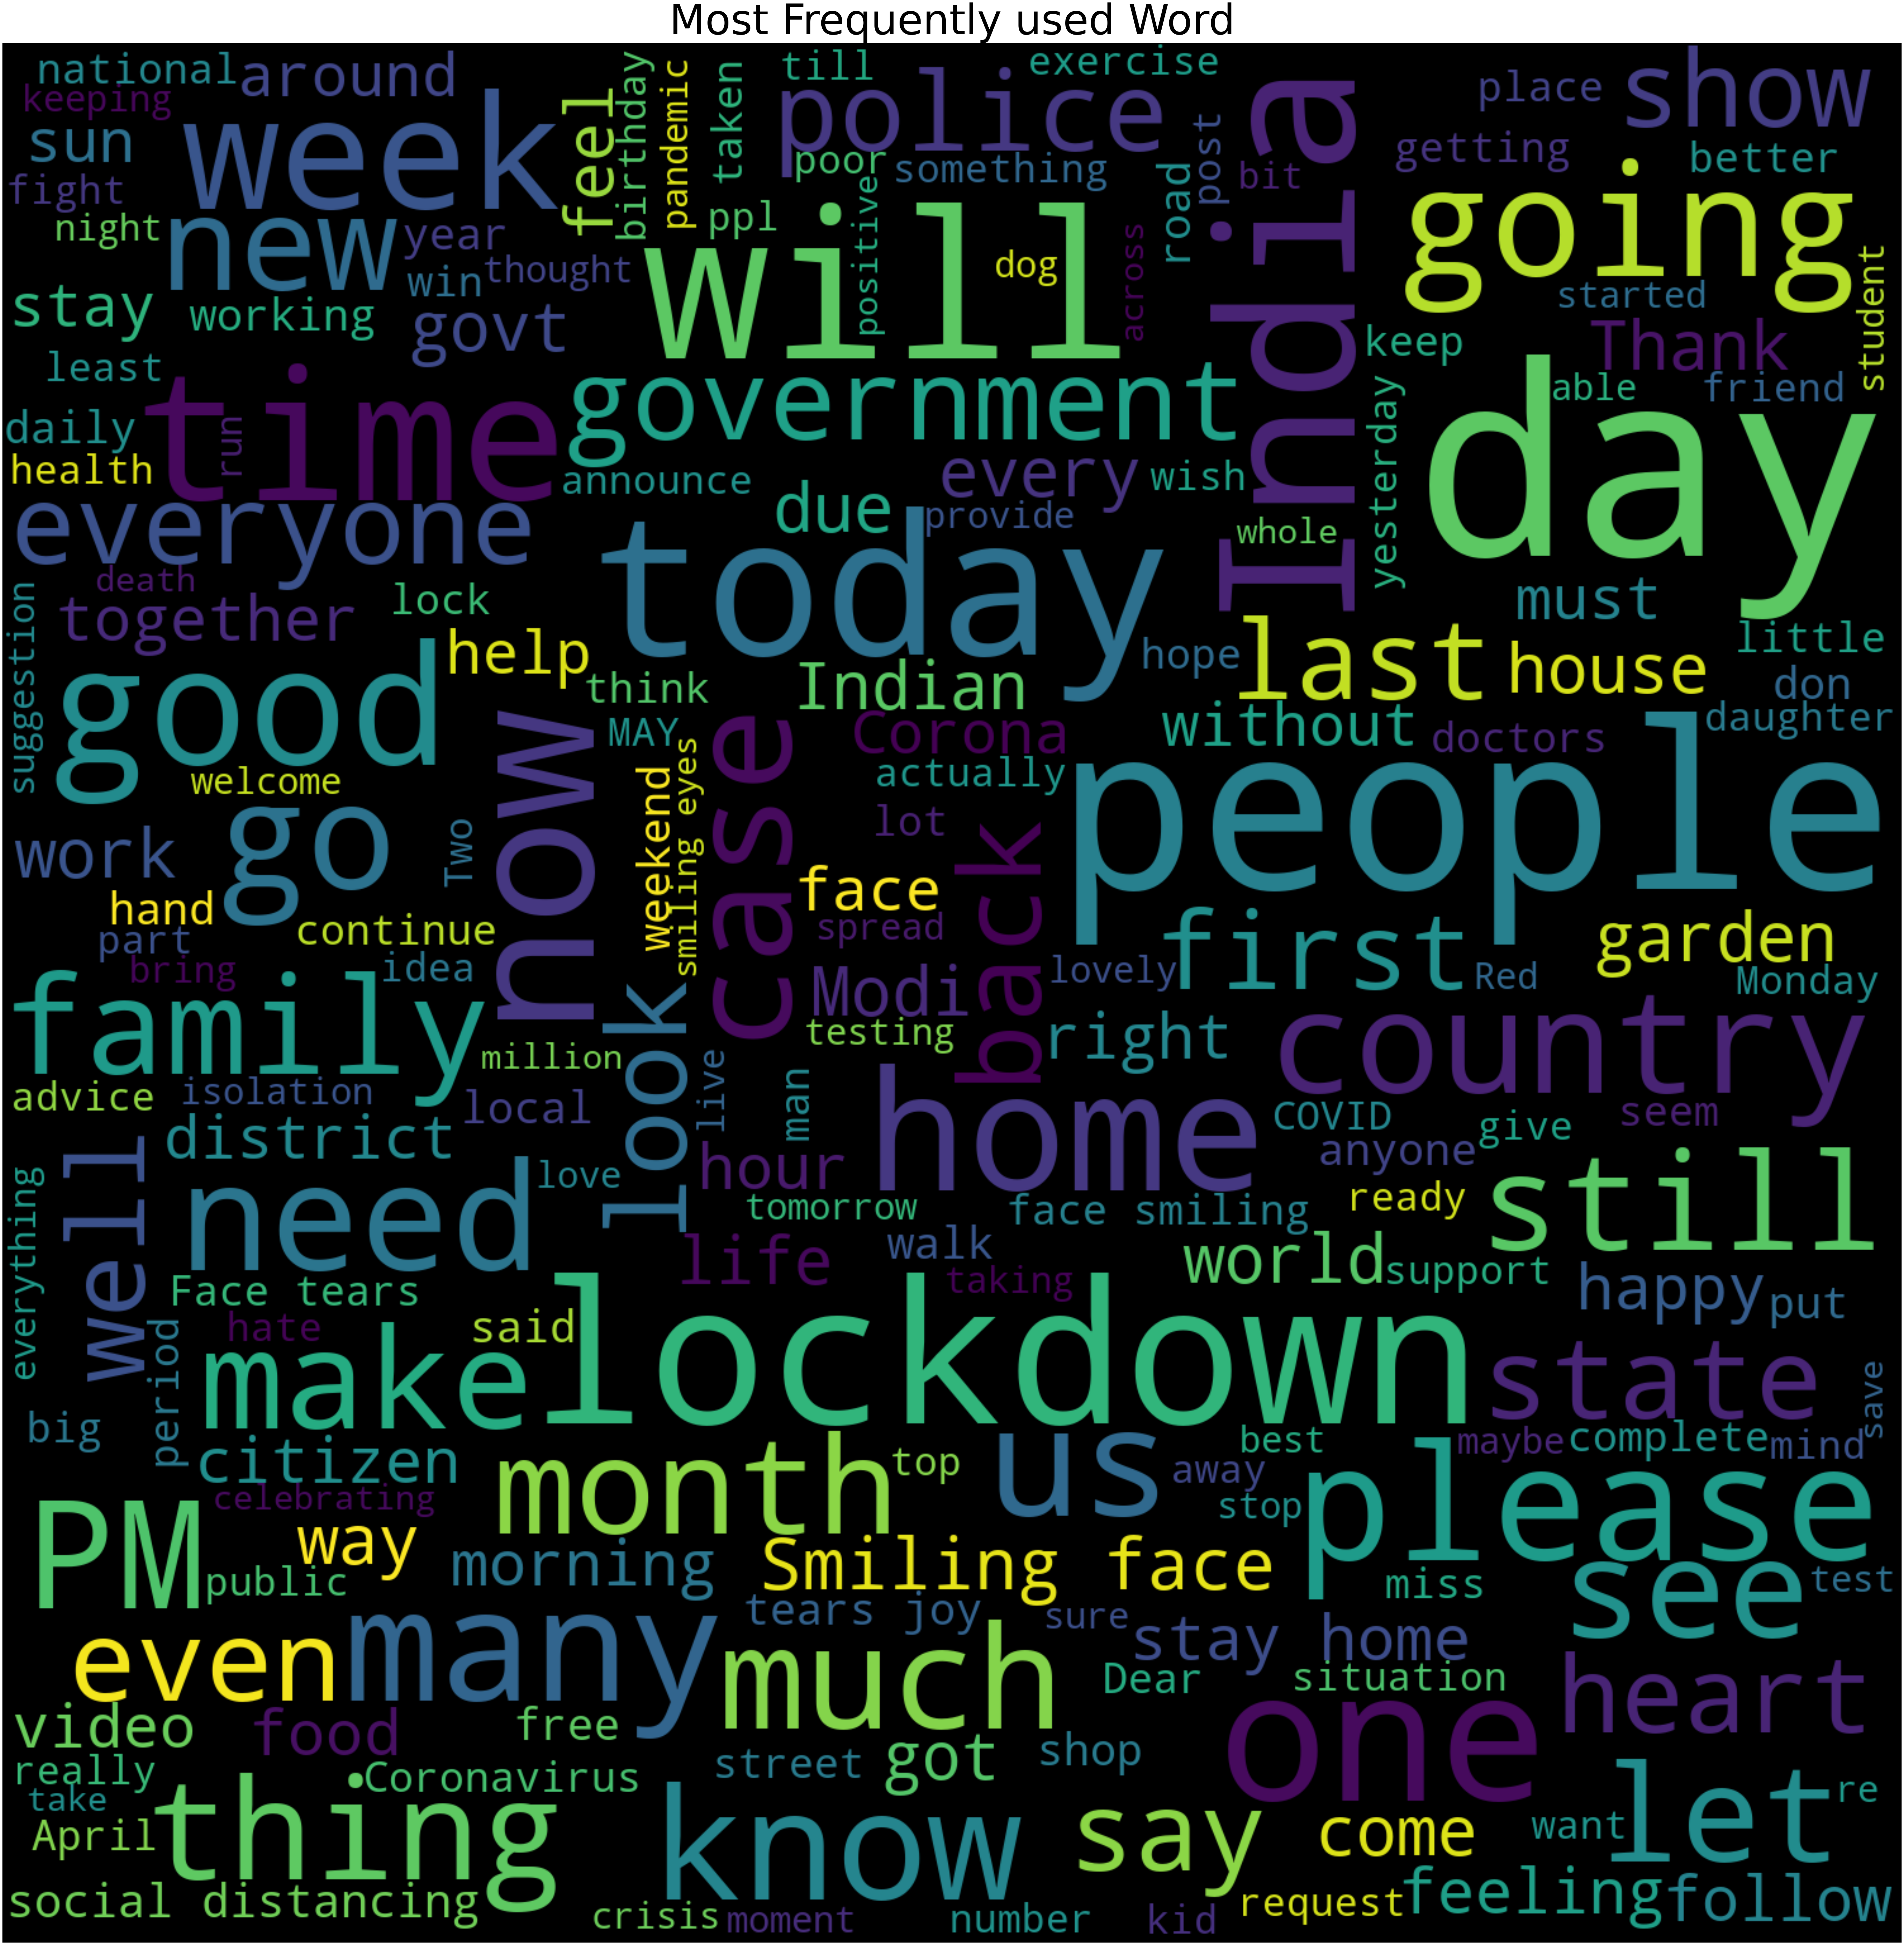

In [20]:
# Plotting Word cloud
plt.rcParams["figure.figsize"] = (100,100)
AllWords = ' '.join([twts for twts in posts_Data['Tweets']])
wrd_cloud = WordCloud(width=1500, height=1500, random_state=35, max_font_size=209).generate(AllWords)
plt.title('Most Frequently used Word',fontsize=119)
plt.imshow(wrd_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()